In [1]:

import matplotlib.pyplot as plt
#plt.switch_backend('agg')
import numpy as np
%matplotlib inline 


Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
def create_groups(D,K,means):
    D2 = np.sum(np.square(D),axis = 0,keepdims=True).T
    means2 = np.sum(np.square(means),axis = 0,keepdims=True)
    M = D2+means2 - 2. * np.dot(D.T,means)
    return np.argmin(M,axis = 1).T
    
def randomize(n,K):
    a = np.arange(n)
    np.random.shuffle(a)
    return a[:K]
def my_kmeans(K,D):
    iteracje = 0
    #k - liczba grup, D - macierz danych d x n, gdzie n to liczba elementow
    n = D.shape[1]
    old_means = []
    groups = []
    randomed = randomize(n,K)
    new_means = D[:,randomed]
    while(not np.array_equal(old_means,new_means)):
        iteracje += 1
        groups = create_groups(D,K,new_means)
        #print "grupy:",groups
        old_means = np.copy(new_means)
        macierz = np.take(np.eye(K),groups,axis = 0)
        #print macierz.shape,groups.shape
        new_means = np.dot(D,macierz)
        g_counts = np.maximum(np.sum(macierz,axis = 0),1)
        new_means /= g_counts
    return groups, new_means

In [3]:
from sklearn import datasets
iris = datasets.load_iris() 
D = iris.data.T



groups, means= my_kmeans(3,D)
print means[:,1]

[ 6.85384615  3.07692308  5.71538462  2.05384615]


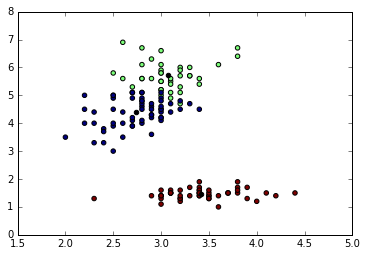

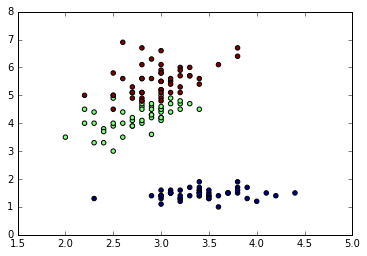

In [4]:
plt.scatter(D[1,:],D[2,:],c = groups)
plt.scatter(means[1,:],means[2,:],color = 'black')
plt.show()

plt.scatter(iris.data[:, 1], iris.data[:, 2], c=iris.target)
plt.show()